In [ ]:
from math import *
import math as mt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly
import plotly.express as px
import plotly.graph_objs as go
from sklearn import metrics
from sklearn import mixture
%matplotlib inline

Question 1

Use the k-means algorithm and Euclidean distance to cluster the following examples in to 3 clusters:
A1=(2,10), A2=(2,5), A3=(8,4), A4=(5,8), A5=(7,5), A6=(6,4), A7=(1,2), A8=(4,9).<br>
(1) Plot the distance matrix based on the Euclidean.<br>
(2) Suppose that the initial seeds (centers of each cluster) are A1, A4 and A7.<br>
Run the k-means algorithm for 1 epoch only. At the end of this epoch show:<br>
a) The new clusters (i.e. the examples belonging to each cluster)<br>
b) The centers of the new clusters<br>
c) Draw a 10 by 10 space with all the 8 points and show theclusters after the first epoch and the new centroids.<br>
d) How many more iterations are needed to converge? Draw the result for each epoch.<br>

Answer

Code

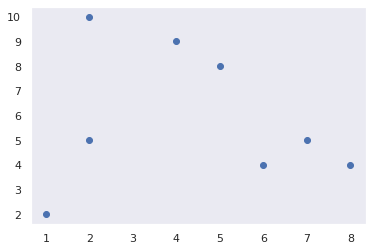

In [ ]:
# defining points
points = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])

# ploting points
plt.scatter(points[:,0],points[:,1])
plt.grid()

In [ ]:
distances = np.zeros((8,8))

for i in range(8):
  for j in range(8): 
    distances[i][j] = mt.sqrt((points[i][0]-points[j][0])**2 + (points[i][1]-points[j][1])**2)

In [ ]:
print(np.round_(distances, decimals = 2))

[[0.   5.   8.49 3.61 7.07 7.21 8.06 2.24]
 [5.   0.   6.08 4.24 5.   4.12 3.16 4.47]
 [8.49 6.08 0.   5.   1.41 2.   7.28 6.4 ]
 [3.61 4.24 5.   0.   3.61 4.12 7.21 1.41]
 [7.07 5.   1.41 3.61 0.   1.41 6.71 5.  ]
 [7.21 4.12 2.   4.12 1.41 0.   5.39 5.39]
 [8.06 3.16 7.28 7.21 6.71 5.39 0.   7.62]
 [2.24 4.47 6.4  1.41 5.   5.39 7.62 0.  ]]


In [ ]:
#inital centroids given as A1, A4, A7
mean1 = points[0]
mean2 = points[3]
mean3 = points[6]

cluster_id = np.zeros(8)

for i in range(8):
  d = mt.sqrt((points[i][0]-mean1[0])**2 + (points[i][1]-mean1[1])**2)

  d2 = mt.sqrt((points[i][0]-mean2[0])**2 + (points[i][1]-mean2[1])**2)
  if(d2<d):
    cluster_id[i] = 1
    d = d2

  d3 = mt.sqrt((points[i][0]-mean3[0])**2 + (points[i][1]-mean3[1])**2)
  if(d3<d):
    cluster_id[i] = 2
    d = d3

print(cluster_id)

[0. 2. 1. 1. 1. 1. 2. 1.]


In [ ]:
# update means
k = 3
mean1 = np.average(points[np.where(cluster_id==0)], axis=0) 
mean2 = np.average(points[np.where(cluster_id==1)], axis=0) 
mean3 = np.average(points[np.where(cluster_id==2)], axis=0) 

print("Mean1: ", mean1,", Mean2: ", mean2,", Mean3: ", mean3)

Mean1:  [ 2. 10.] , Mean2:  [6. 6.] , Mean3:  [1.5 3.5]


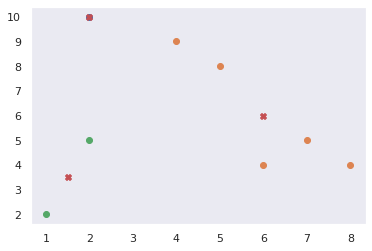

In [ ]:
# ploting clusters with different colors
plt.scatter(points[np.where(cluster_id==0),0],points[np.where(cluster_id==0),1])
plt.scatter(points[np.where(cluster_id==1),0],points[np.where(cluster_id==1),1])
plt.scatter(points[np.where(cluster_id==2),0],points[np.where(cluster_id==2),1])
Mean = np.vstack((np.vstack((mean1,mean2)),mean3))
plt.scatter(Mean[:,0],Mean[:,1],marker='X')
plt.grid()

Epoch 1 iteration

In [ ]:
# updating clusters
cluster_id = np.zeros(8)

for i in range(8):
  d = mt.sqrt((points[i][0]-mean1[0])**2 + (points[i][1]-mean1[1])**2)

  d2 = mt.sqrt((points[i][0]-mean2[0])**2 + (points[i][1]-mean2[1])**2)
  if(d2<d):
    cluster_id[i] = 1
    d = d2

  d3 = mt.sqrt((points[i][0]-mean3[0])**2 + (points[i][1]-mean3[1])**2)
  if(d3<d):
    cluster_id[i] = 2
    d = d3

print(cluster_id)

[0. 2. 1. 1. 1. 1. 2. 0.]


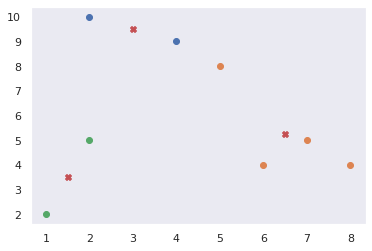

In [ ]:
# update means of new clusters
mean1 = np.average(points[np.where(cluster_id==0)], axis=0) 
mean2 = np.average(points[np.where(cluster_id==1)], axis=0) 
mean3 = np.average(points[np.where(cluster_id==2)], axis=0) 

# ploting
plt.scatter(points[np.where(cluster_id==0),0],points[np.where(cluster_id==0),1])
plt.scatter(points[np.where(cluster_id==1),0],points[np.where(cluster_id==1),1])
plt.scatter(points[np.where(cluster_id==2),0],points[np.where(cluster_id==2),1])
Mean = np.vstack((np.vstack((mean1,mean2)),mean3))
plt.scatter(Mean[:,0],Mean[:,1],marker='X')
plt.grid()

Epoch 2 iteration

[0. 2. 1. 0. 1. 1. 2. 0.]


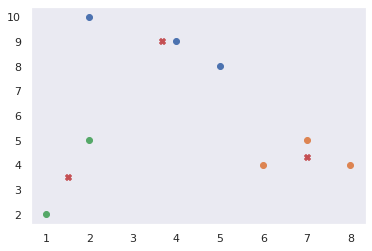

In [ ]:
# updating clusters
cluster_id = np.zeros(8)

for i in range(8):
  d = mt.sqrt((points[i][0]-mean1[0])**2 + (points[i][1]-mean1[1])**2)

  d2 = mt.sqrt((points[i][0]-mean2[0])**2 + (points[i][1]-mean2[1])**2)
  if(d2<d):
    cluster_id[i] = 1
    d = d2

  d3 = mt.sqrt((points[i][0]-mean3[0])**2 + (points[i][1]-mean3[1])**2)
  if(d3<d):
    cluster_id[i] = 2
    d = d3

print(cluster_id)

# update means of new clusters
mean1 = np.average(points[np.where(cluster_id==0)], axis=0) 
mean2 = np.average(points[np.where(cluster_id==1)], axis=0) 
mean3 = np.average(points[np.where(cluster_id==2)], axis=0) 

# ploting
plt.scatter(points[np.where(cluster_id==0),0],points[np.where(cluster_id==0),1])
plt.scatter(points[np.where(cluster_id==1),0],points[np.where(cluster_id==1),1])
plt.scatter(points[np.where(cluster_id==2),0],points[np.where(cluster_id==2),1])
Mean = np.vstack((np.vstack((mean1,mean2)),mean3))
plt.scatter(Mean[:,0],Mean[:,1],marker='X')
plt.grid()

Question 2

Implement k-means clustering algorithm. Use the two dataset files for the following: <br>
(1) Visualize the datasets.<br>
(2) Use random initial cluster centers and try the algorithm for different values for K (i.e. k=1,2,3...)<br>
(3) Visualize the cluster formation for each value of K for both the datasets.<br>
(4) Utilize the Elbow method to find out the optimal number of Clusters (i.e. K)<br>

Answer

Code

In [ ]:
df1 = pd.read_excel('Question2a.xlsx', header=None)
df2 = pd.read_excel('Question2b.xlsx')

In [ ]:
X1, Y1 = df1[0].values, df1[1].values
X2, Y2 = df2['x1'].values, df2['x2'].values

Text(0.5, 1.0, 'Dataset 1')

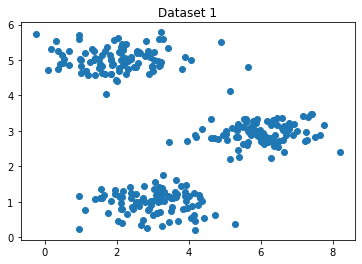

In [ ]:
plt.scatter(X1,Y1)
plt.title('Dataset 1')

Text(0.5, 1.0, 'Dataset 2')

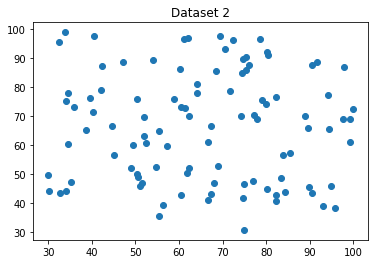

In [ ]:
plt.scatter(X2,Y2)
plt.title('Dataset 2')

In [ ]:
data1 = df1.to_numpy()

data2 = df2.to_numpy()[:,:2]

# 4 clusters along with visualisation

Text(0.5, 1.0, 'Dataset 2')

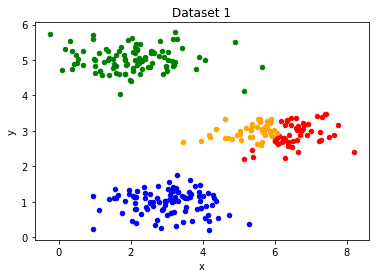

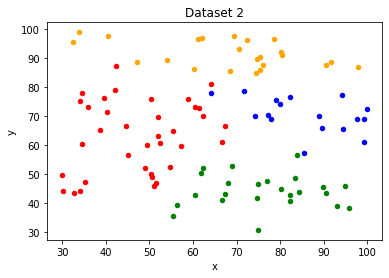

In [ ]:
gmm_1 = GaussianMixture(n_components=4).fit(data1)
gmm_2 = GaussianMixture(n_components=4).fit(data2)

label_1 = gmm_1.predict(data1)
label_2 = gmm_2.predict(data2)

new_data1 = np.insert(data1,2,label_1, axis=1)

df_new1 = pd.DataFrame(new_data1, columns=['x', 'y', 'z'])
ax = df_new1[df_new1.z == 0].plot.scatter(x='x', y='y', color='red')
df_new1[df_new1.z == 1].plot.scatter(x='x', y='y', color='green',ax=ax)
df_new1[df_new1.z == 2].plot.scatter(x='x', y='y', color='blue',ax=ax)
df_new1[df_new1.z == 3].plot.scatter(x='x', y='y', color='orange',ax=ax)
ax.set_title('Dataset 1')

new_data2 = np.insert(data2,2,label_2, axis=1)

df_new2 = pd.DataFrame(new_data2, columns=['x', 'y', 'z'])
ax2 = df_new2[df_new2.z == 0].plot.scatter(x='x', y='y', color='green')
df_new2[df_new2.z == 1].plot.scatter(x='x', y='y', color='orange',ax=ax2)
df_new2[df_new2.z == 2].plot.scatter(x='x', y='y', color='red',ax=ax2)
df_new2[df_new2.z == 3].plot.scatter(x='x', y='y', color='blue',ax=ax2)
ax2.set_title('Dataset 2')

# 3 clusters along with visualisation

Text(0.5, 1.0, 'Dataset 2')

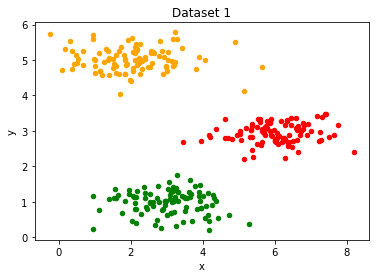

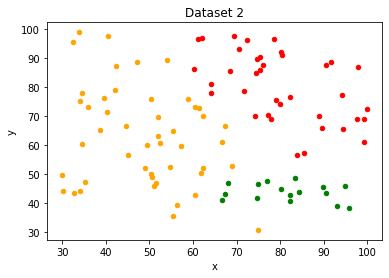

In [ ]:
gmm_1 = GaussianMixture(n_components=3).fit(data1)
gmm_2 = GaussianMixture(n_components=3).fit(data2)

label_1 = gmm_1.predict(data1)
label_2 = gmm_2.predict(data2)

new_data1 = np.insert(data1,2,label_1, axis=1)

df_new1 = pd.DataFrame(new_data1, columns=['x', 'y', 'z'])
ax = df_new1[df_new1.z == 0].plot.scatter(x='x', y='y', color='green')
df_new1[df_new1.z == 1].plot.scatter(x='x', y='y', color='orange',ax=ax)
df_new1[df_new1.z == 2].plot.scatter(x='x', y='y', color='red',ax=ax)
df_new1[df_new1.z == 3].plot.scatter(x='x', y='y', color='blue',ax=ax)
ax.set_title('Dataset 1')

new_data2 = np.insert(data2,2,label_2, axis=1)

df_new2 = pd.DataFrame(new_data2, columns=['x', 'y', 'z'])
ax2 = df_new2[df_new2.z == 0].plot.scatter(x='x', y='y', color='green')
df_new2[df_new2.z == 1].plot.scatter(x='x', y='y', color='orange',ax=ax2)
df_new2[df_new2.z == 2].plot.scatter(x='x', y='y', color='red',ax=ax2)
df_new2[df_new2.z == 3].plot.scatter(x='x', y='y', color='blue',ax=ax2)
ax2.set_title('Dataset 2')

# 2 clusters along with visualisation

Text(0.5, 1.0, 'Dataset 2')

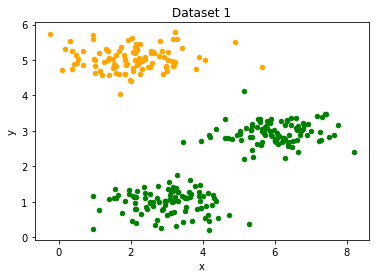

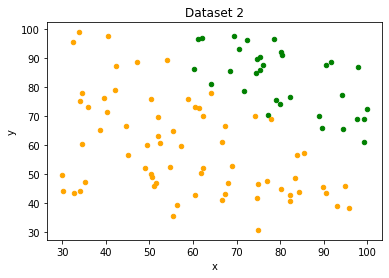

In [ ]:
gmm_1 = GaussianMixture(n_components=2).fit(data1)
gmm_2 = GaussianMixture(n_components=2).fit(data2)

label_1 = gmm_1.predict(data1)
label_2 = gmm_2.predict(data2)

new_data1 = np.insert(data1,2,label_1, axis=1)

df_new1 = pd.DataFrame(new_data1, columns=['x', 'y', 'z'])
ax = df_new1[df_new1.z == 0].plot.scatter(x='x', y='y', color='green')
df_new1[df_new1.z == 1].plot.scatter(x='x', y='y', color='orange',ax=ax)
df_new1[df_new1.z == 2].plot.scatter(x='x', y='y', color='red',ax=ax)
df_new1[df_new1.z == 3].plot.scatter(x='x', y='y', color='blue',ax=ax)
ax.set_title('Dataset 1')

new_data2 = np.insert(data2,2,label_2, axis=1)

df_new2 = pd.DataFrame(new_data2, columns=['x', 'y', 'z'])
ax2 = df_new2[df_new2.z == 0].plot.scatter(x='x', y='y', color='green')
df_new2[df_new2.z == 1].plot.scatter(x='x', y='y', color='orange',ax=ax2)
df_new2[df_new2.z == 2].plot.scatter(x='x', y='y', color='red',ax=ax2)
df_new2[df_new2.z == 3].plot.scatter(x='x', y='y', color='blue',ax=ax2)
ax2.set_title('Dataset 2')

# 1 cluster along with visualisation

Text(0.5, 1.0, 'Dataset 2')

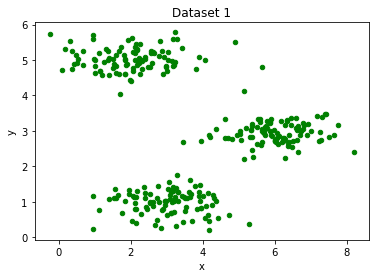

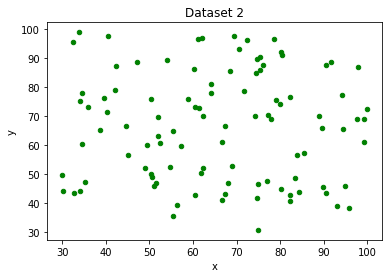

In [ ]:
gmm_1 = GaussianMixture(n_components=1).fit(data1)
gmm_2 = GaussianMixture(n_components=1).fit(data2)

label_1 = gmm_1.predict(data1)
label_2 = gmm_2.predict(data2)

new_data1 = np.insert(data1,2,label_1, axis=1)

df_new1 = pd.DataFrame(new_data1, columns=['x', 'y', 'z'])
ax = df_new1[df_new1.z == 0].plot.scatter(x='x', y='y', color='green')
df_new1[df_new1.z == 1].plot.scatter(x='x', y='y', color='orange',ax=ax)
df_new1[df_new1.z == 2].plot.scatter(x='x', y='y', color='red',ax=ax)
df_new1[df_new1.z == 3].plot.scatter(x='x', y='y', color='blue',ax=ax)
ax.set_title('Dataset 1')

new_data2 = np.insert(data2,2,label_2, axis=1)

df_new2 = pd.DataFrame(new_data2, columns=['x', 'y', 'z'])
ax2 = df_new2[df_new2.z == 0].plot.scatter(x='x', y='y', color='green')
df_new2[df_new2.z == 1].plot.scatter(x='x', y='y', color='orange',ax=ax2)
df_new2[df_new2.z == 2].plot.scatter(x='x', y='y', color='red',ax=ax2)
df_new2[df_new2.z == 3].plot.scatter(x='x', y='y', color='blue',ax=ax2)
ax2.set_title('Dataset 2')

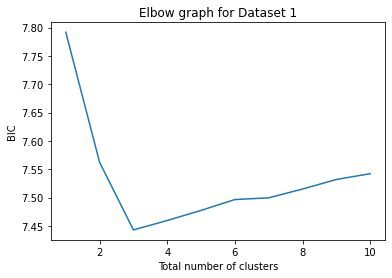

In [ ]:
bics = []

for i in range(1, 11): 
    gmm = GaussianMixture(n_components = i)
    gmm.fit(data1)
    bics.append(log(gmm.bic(data1)))
        
plt.plot(range(1, 11),bics)
plt.xlabel('Total number of clusters')
plt.ylabel('BIC') 
plt.title('Elbow graph for Dataset 1')
plt.show()

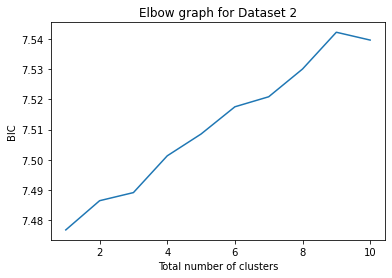

In [ ]:
bics = []
for i in range(1, 11): 
    gmm = GaussianMixture(n_components = i)
    gmm.fit(data2)
    bics.append(log(gmm.bic(data2)))
        
plt.plot(range(1, 11),bics)
plt.xlabel('Total number of clusters')
plt.ylabel('BIC') 
plt.title('Elbow graph for Dataset 2')
plt.show()

Result

The resulting graphs of the cluster sets and the elbow graphs are shown as above.

Observation/Justification

For dataset 1, it is evident from the elbow graph that the optimal number of clusters is 3.


Question 3

In [ ]:
records=pd.read_csv('dataset3.csv')

records.columns = ['id','sex','age','income','score']
records.head()

,id,sex,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
label_encoder = preprocessing.LabelEncoder()
records['sex']= label_encoder.fit_transform(records['sex'])
records.head()

,id,sex,age,income,score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

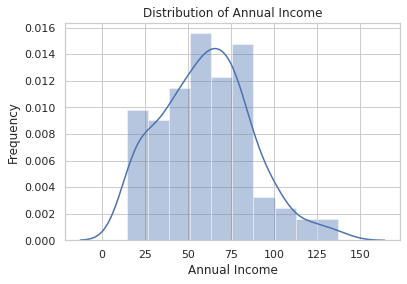

In [ ]:
plt.figure()

sns.set(style = 'whitegrid')
sns.distplot(records['income'], color='b')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

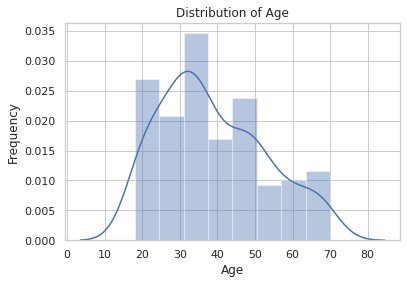

In [ ]:
plt.figure()
sns.set(style = 'whitegrid')
sns.distplot(records['age'], color='b')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

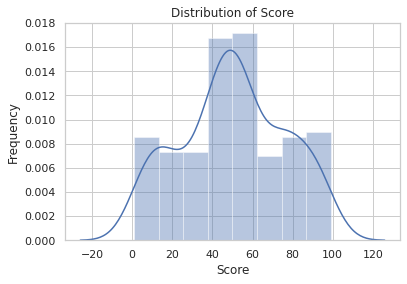

In [ ]:
plt.figure()
sns.set(style = 'whitegrid')
sns.distplot(records['score'], color='b')
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')

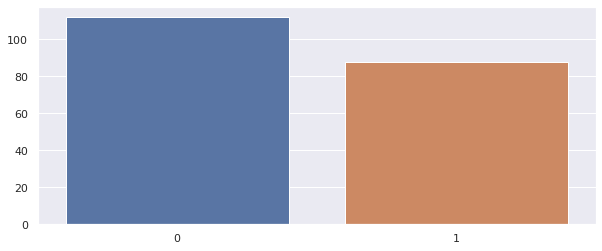

In [ ]:
genders = records.sex.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)

In [ ]:
df = records[['id','sex','age','income','score']]

SvI=records[['income','score']]
SvA=records[['score','age']]
AvI=records[['age','income']]

# Scatterplot 

Text(0.5, 1.0, 'Spending Score vs Age')

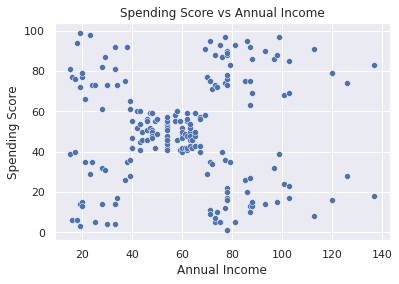

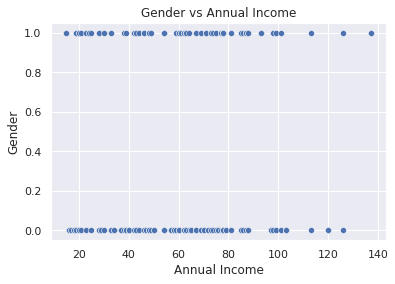

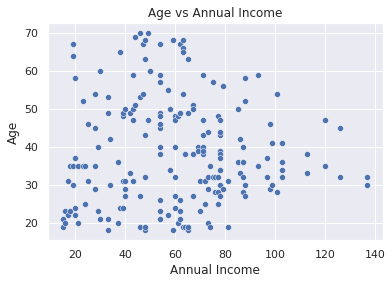

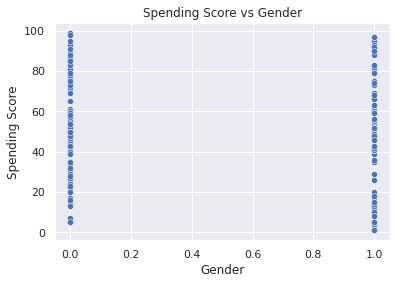

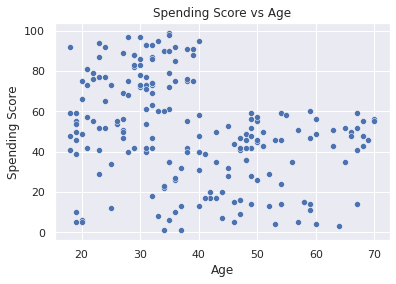

In [ ]:
plt.figure()
sns.scatterplot(x = 'income',y = 'score',  data = df)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score') 
plt.title('Spending Score vs Annual Income')

plt.figure()
sns.scatterplot(x = 'income',y = 'sex',  data = df)
plt.xlabel('Annual Income')
plt.ylabel('Gender') 
plt.title('Gender vs Annual Income')

plt.figure()
sns.scatterplot(x = 'income',y = 'age',  data = df)
plt.xlabel('Annual Income')
plt.ylabel('Age') 
plt.title('Age vs Annual Income')

plt.figure()
sns.scatterplot(x = 'sex',y = 'score',  data = df)
plt.xlabel('Gender')
plt.ylabel('Spending Score') 
plt.title('Spending Score vs Gender')

plt.figure()
sns.scatterplot(x = 'age',y = 'score',  data = df)
plt.xlabel('Age')
plt.ylabel('Spending Score') 
plt.title('Spending Score vs Age')

In [ ]:
def SelBest(arr:list, X:int)->list:             # This function will return the set of X configurations with shorter distance

    dx=np.argsort(arr)[:X]
    return arr[dx]

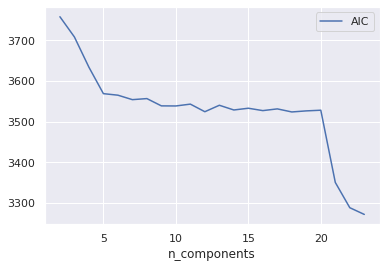

In [ ]:
n_components = np.arange(2, 24)
models = [mixture.GaussianMixture(n_components=n, covariance_type='full', random_state = 42).fit(SvI) for n in n_components]

plt.plot(n_components, [m.aic(SvI) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

# Gaussian Mixture Model

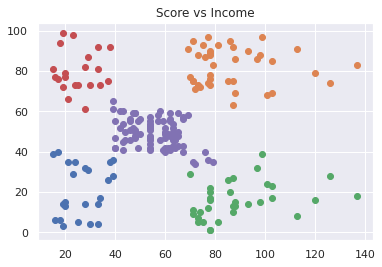

In [ ]:
gmm = GaussianMixture(n_components=5)
gmm.fit(SvI)


labels = gmm.predict(SvI)
frame = pd.DataFrame(SvI)

frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

for k in range(0,5):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"])
    plt.title('Score vs Income')
    
plt.show()

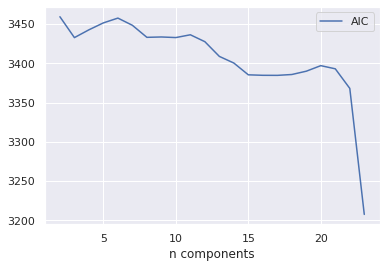

In [ ]:
n_components = np.arange(2, 24)
models = [mixture.GaussianMixture(n_components=n, covariance_type='full', random_state = 42).fit(AvI) for n in n_components]

plt.plot(n_components, [m.aic(AvI) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n components');

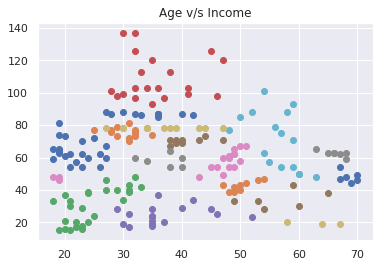

In [ ]:
gmm = GaussianMixture(n_components=21)
gmm.fit(AvI)

labels = gmm.predict(AvI)
frame = pd.DataFrame(AvI)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

for k in range(0,24):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"])
    plt.title('Age v/s Income')
    
plt.show()

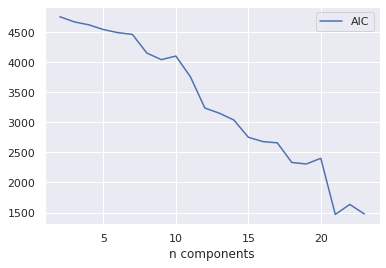

In [ ]:
n_components = np.arange(2, 24)
models = [mixture.GaussianMixture(n_components=n, covariance_type='full', random_state = 42).fit(AvI) for n in n_components]

plt.plot(n_components, [m.aic(AvI) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n components');

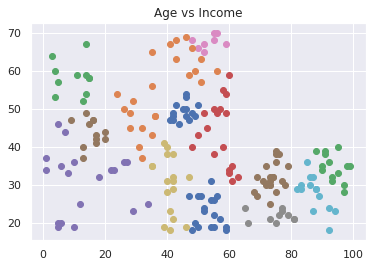

In [ ]:
gmm = GaussianMixture(n_components=16)
gmm.fit(SvA)

labels = gmm.predict(SvA)
frame = pd.DataFrame(SvA)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

for k in range(0,16):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"])
    plt.title('Age vs Income')
    
plt.show()

Result

The resulting graphs for various parameter comparisions and the patterns are shown above.

Observation/Justification

We are able to separate the Score vs Income data points into 5 clusters.
For age vs income the data distribution doesn't fit into an observable pattern.